In [1]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Filter for Data Analyst jobs only

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

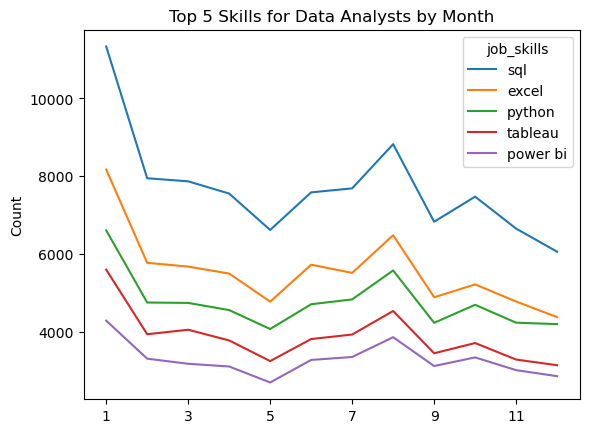

In [3]:
#Line chart from earlier lesson

#Create a column for month

df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

#Explode the job skill lists

df_DA_explode = df_DA.explode('job_skills')

#Create a pivot table for skills by month

df_DA_pivot = df_DA_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size', fill_value = 0)

#Create a total count row for the pivot table

df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

#Sort columns by total counts

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending = False).index]

#Drop the total row after the sort

df_DA_pivot = df_DA_pivot.drop('Total')

#Create the plot

df_DA_pivot.iloc[:, :5].plot(kind = 'line')
plt.title('Top 5 Skills for Data Analysts by Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

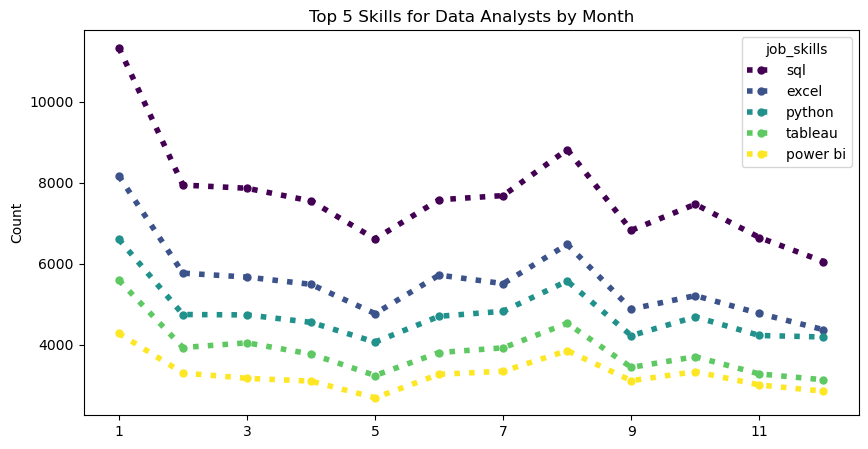

In [17]:
#Customize the chart

df_DA_pivot.iloc[:, :5].plot(
    kind = 'line',
    linewidth = 4,                   #Adjust thickness of the lines
    linestyle = ':',                 #Adjust type of line (options: '-', '--', '-.', ':')
    colormap = 'viridis',            #Adjust line color pallette
    marker = 'o',                    #Adds marker at tick points
    markersize = 5,                  #Adjust the marker size
    figsize = (10, 5)                #Adjust dimensions of the figure (x length, y length)
    )
plt.title('Top 5 Skills for Data Analysts by Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

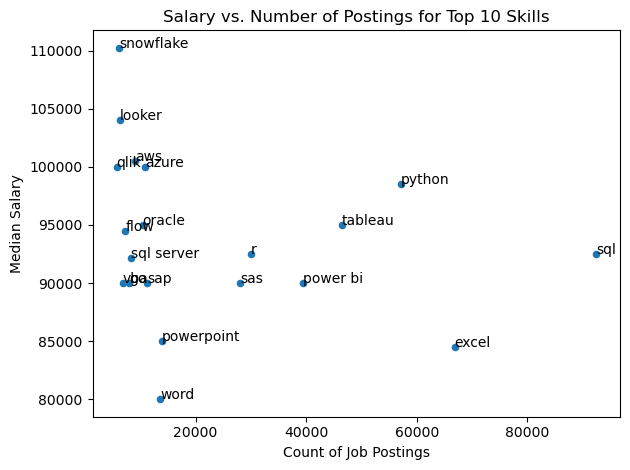

In [19]:
#Scatterplot from earlier lesson

#Explode the job skills

df_exploded = df_DA.explode('job_skills')

#Aggregate the variables

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

#Filter for the 20 most frequent skills only

skill_stats = skill_stats.sort_values(by = 'skill_count', ascending = False).head(20)

#Plot the data

skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.title('Salary vs. Number of Postings for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],
            skill_stats['median_salary'].iloc[i],
            txt)

plt.tight_layout()
plt.show()

In [20]:
#Import adjustText library (need to conda install through terminal first)

from adjustText import adjust_text

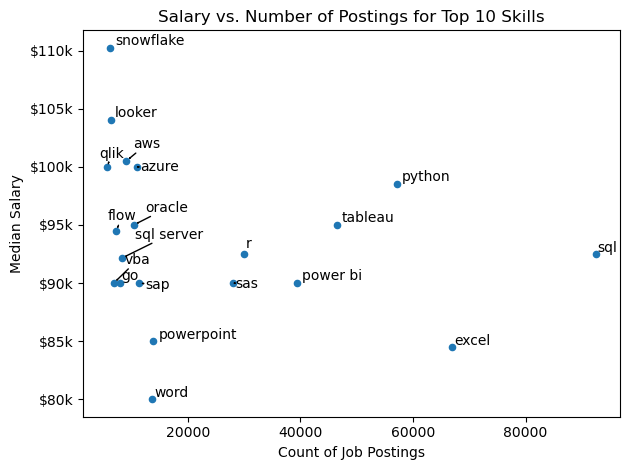

In [27]:
#Customize the plot

skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.title('Salary vs. Number of Postings for Top 10 Skills')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],
            skill_stats['median_salary'].iloc[i],
            txt))

adjust_text(                                                                          #Shifts point labels to not overlap
    texts,
    arrowprops = dict(arrowstyle = '->', color = 'black', lw = 1)                     #Adds and formats arrows connecting labels to points
    )

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y / 1000)}k'))  #Format the y-axis

plt.tight_layout()
plt.show()